In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
historical_masterfile = "data/historical_masterfile.csv"

df = pd.read_csv(historical_masterfile)
df["date"] = pd.to_datetime(df["disp_dt"], format="%d%b%Y", errors="coerce")
cat_file = "data/category_data.csv"
cat_data = pd.read_csv(cat_file, sep=';')
df_cat = df.merge(
    cat_data,
    left_on="nber",
    right_on="nber_subcategory",
    how="left"  
)
df_cat["patent"] = df_cat["patent"].astype(str).str.lstrip("0")
df_cat.drop(columns=["nber", "pubno", "appl_id", "appl_dt", "prior_dt", "pub_dt", "disp_dt", "disp_ty", "exp_dt", "exp_dt_max", "pta"], inplace=True)

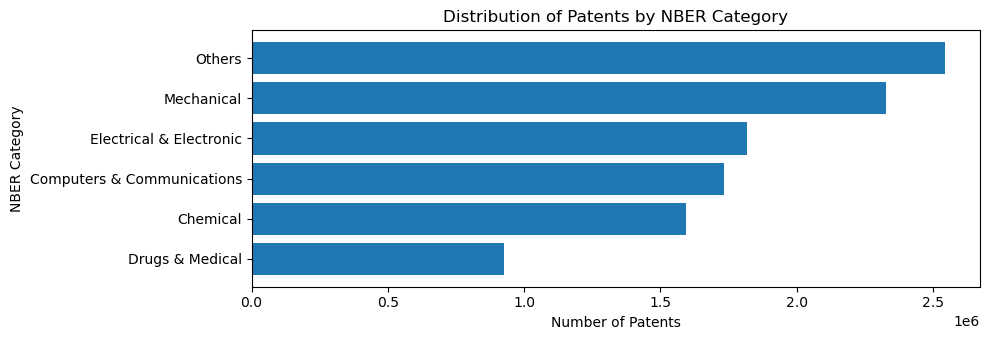

In [3]:
dist = (
    df_cat
    .groupby(["nber_category", "nber_cat_name"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

plt.figure(figsize=(10, 3.5))
plt.barh(dist["nber_cat_name"], dist["count"])
plt.xlabel("Number of Patents")
plt.ylabel("NBER Category")
plt.title("Distribution of Patents by NBER Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [4]:
tf_file = "data/membership_hdbscan_tf.csv"
w2v_file = "data/membership_hdbscan_w2v.csv"

tf_data = pd.read_csv(tf_file)
tf_data["patent_id"] = tf_data["patent_id"].astype(str).str.lstrip("0")
tf_data = tf_data[tf_data["Cluster"] != -1].merge(
    df_cat,
    left_on="patent_id", 
    right_on="patent", 
    how="left"
)

w2v_data = pd.read_csv(w2v_file)
w2v_data["patent_id"] = w2v_data["patent_id"].astype(str).str.lstrip("0")
w2v_data = w2v_data[w2v_data["Cluster"] != -1].merge(
    df_cat,
    left_on="patent_id", 
    right_on="patent", 
    how="left"
)

# TF-IDF Category Analysis

### NBER Category Analysis

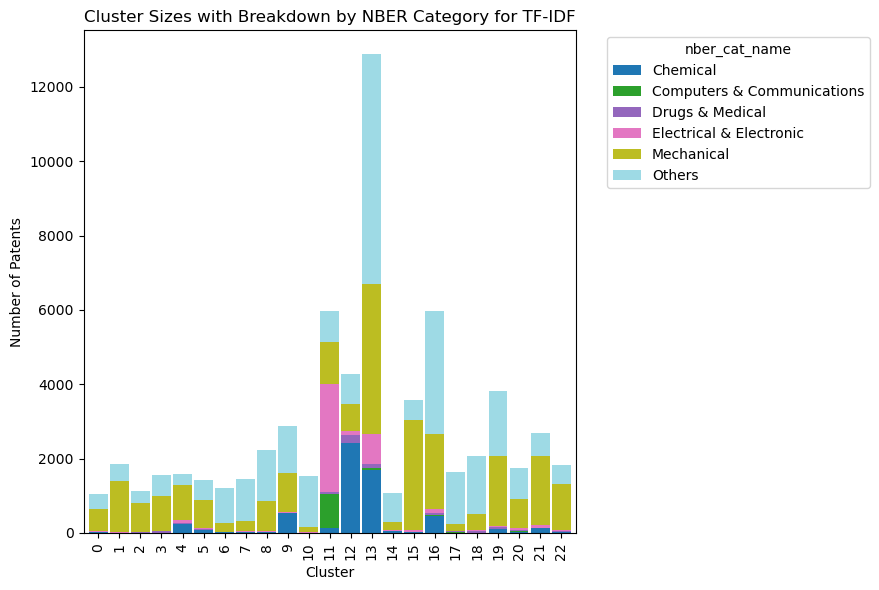

In [5]:
distribution_counts = tf_data.groupby(["Cluster", "nber_cat_name"]).size().reset_index(name="count")

pivot_counts = distribution_counts.pivot(index="Cluster", columns="nber_cat_name", values="count").fillna(0)

pivot_counts = pivot_counts.sort_index()

ax = pivot_counts.plot(kind="bar", stacked=True, figsize=(9, 6), width = 0.9, colormap="tab20")
plt.ylabel("Number of Patents")
plt.title("Cluster Sizes with Breakdown by NBER Category for TF-IDF")
plt.legend(title="nber_cat_name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### NBER Sub-Category Analysis

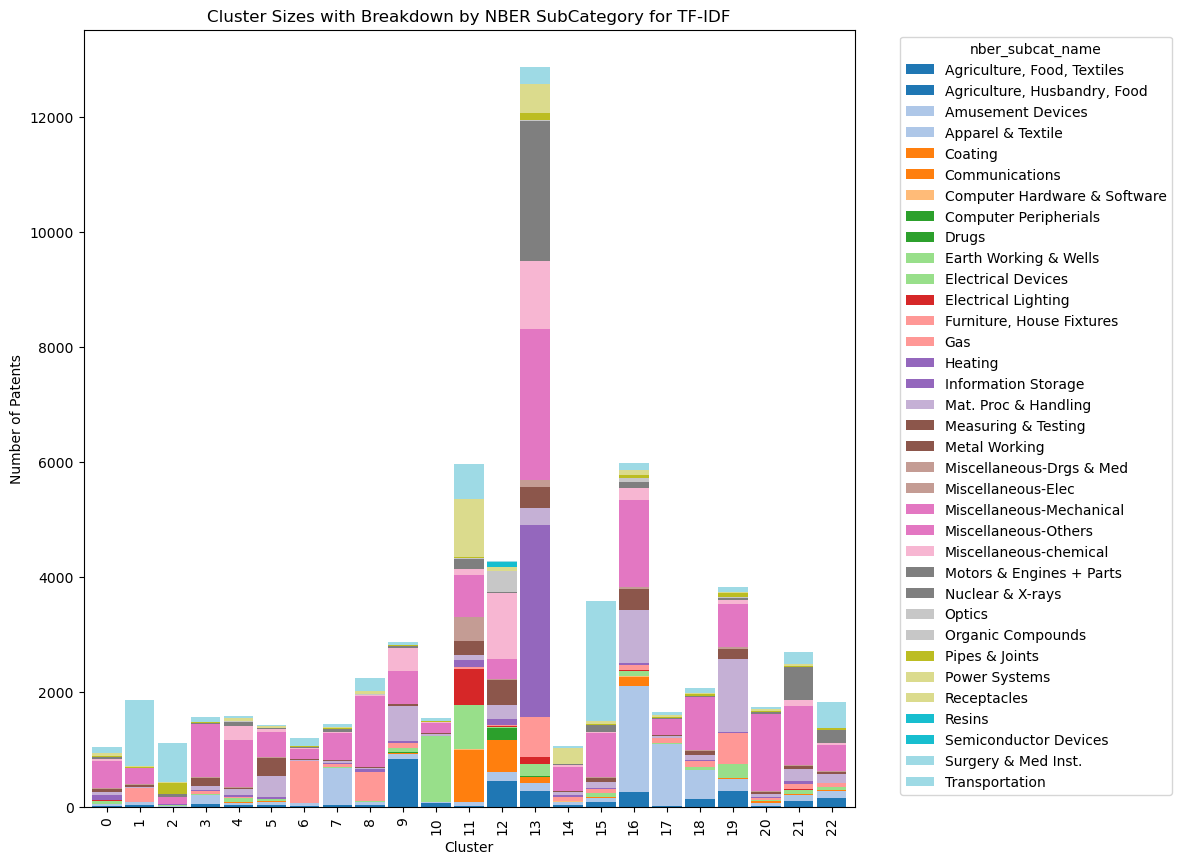

In [6]:
distribution_counts = tf_data.groupby(["Cluster", "nber_subcat_name"]).size().reset_index(name="count")

pivot_counts = distribution_counts.pivot(index="Cluster", columns="nber_subcat_name", values="count").fillna(0)

pivot_counts = pivot_counts.sort_index()

ax = pivot_counts.plot(kind="bar", stacked=True, figsize=(12, 9), width=0.9, colormap="tab20")
plt.ylabel("Number of Patents")
plt.title("Cluster Sizes with Breakdown by NBER SubCategory for TF-IDF")
plt.legend(title="nber_subcat_name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# WORD2VEC Category Analysis

### NBER Category Analysis

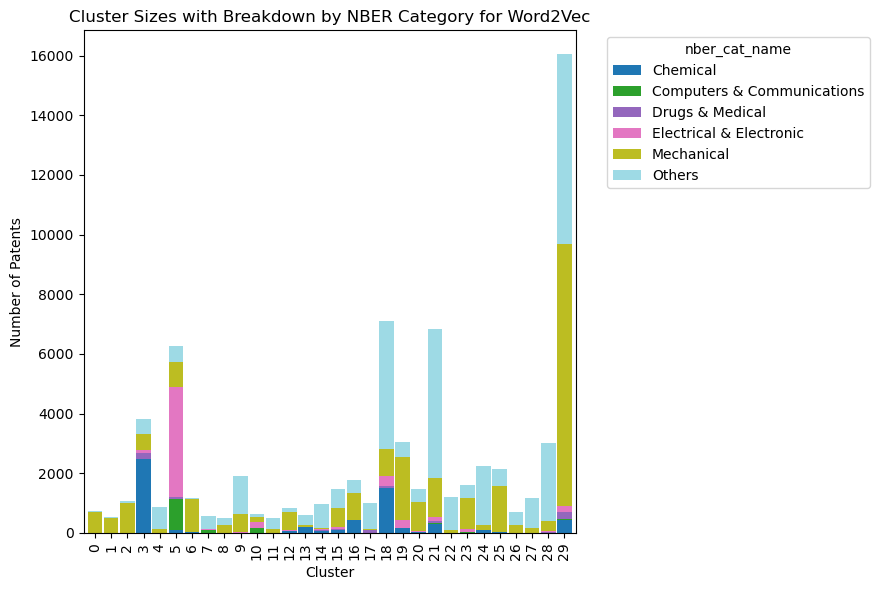

In [7]:
distribution_counts = w2v_data.groupby(["Cluster", "nber_cat_name"]).size().reset_index(name="count")

pivot_counts = distribution_counts.pivot(index="Cluster", columns="nber_cat_name", values="count").fillna(0)

pivot_counts = pivot_counts.sort_index()

ax = pivot_counts.plot(kind="bar", stacked=True, figsize=(9, 6), width=0.9, colormap="tab20")
plt.ylabel("Number of Patents")
plt.title("Cluster Sizes with Breakdown by NBER Category for Word2Vec")
plt.legend(title="nber_cat_name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### NBER Sub-Category Analysis

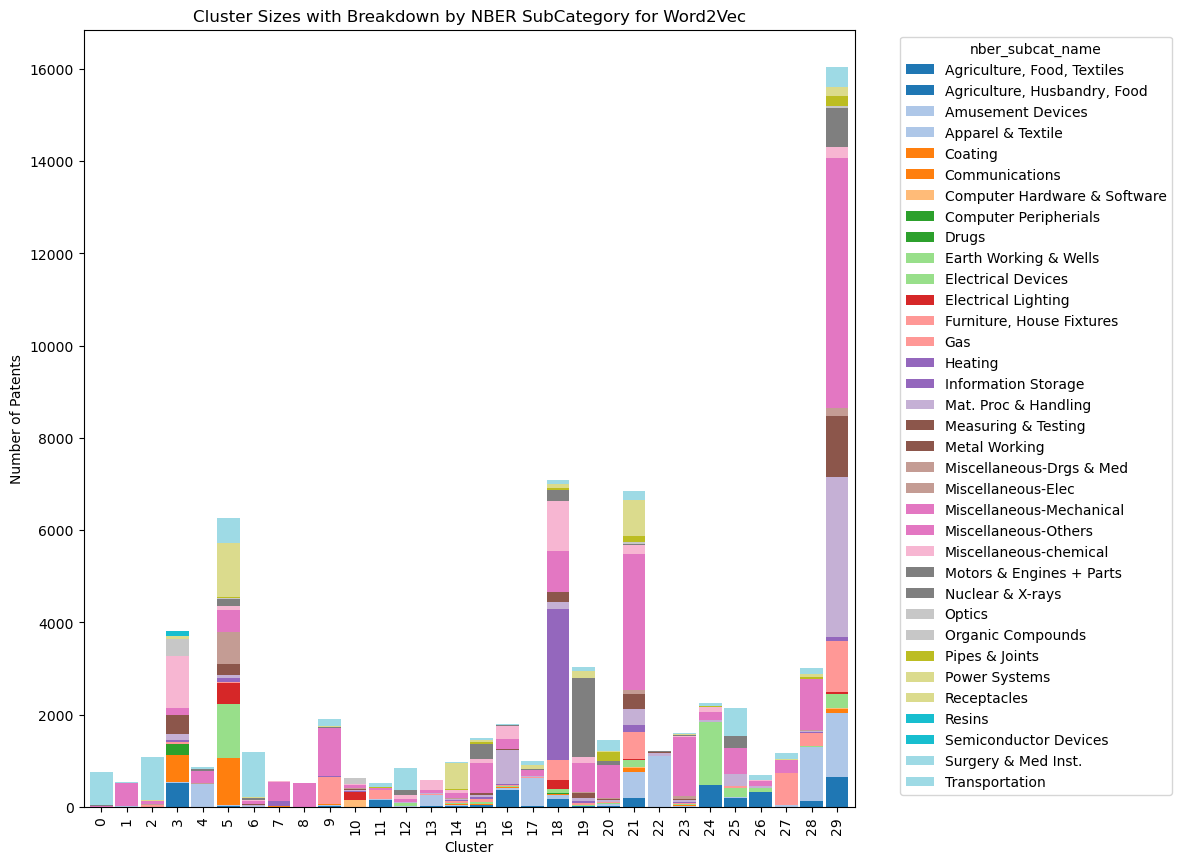

In [8]:
distribution_counts = w2v_data.groupby(["Cluster", "nber_subcat_name"]).size().reset_index(name="count")

pivot_counts = distribution_counts.pivot(index="Cluster", columns="nber_subcat_name", values="count").fillna(0)

pivot_counts = pivot_counts.sort_index()

ax = pivot_counts.plot(kind="bar", stacked=True, figsize=(12, 9), width=0.9, colormap="tab20")
plt.ylabel("Number of Patents")
plt.title("Cluster Sizes with Breakdown by NBER SubCategory for Word2Vec")
plt.legend(title="nber_subcat_name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# BERT Analysis

In [9]:
bert_results_file = "data/bert/topics_hdbscan.csv"
bert_results = pd.read_csv(bert_results_file)
bert_results["patent_id"] = bert_results["patent_id"].astype(str)
bert_analysis = bert_results.merge(
    df_cat[["patent", "date"]],
    left_on="patent_id", 
    right_on="patent", 
    how="left"
)
bert_analysis["date"] = pd.to_datetime(bert_analysis["date"])
bert_analysis["month"] = bert_analysis["date"].dt.to_period("M").astype(str)

COLOR_MAP = {
    0:  "#843c39",  # 0 : gun
    1:  "#e7ba52",  # 1 : tire, wheel
    2:  "#9edae5",  # 2 : bottle, stopper
    3:  "#f8c7dc",  # 3 : imaging devices
    4:  "#ff9436",  # 4 : electro magnetic
    5:  "#f9f920",  # 5 : chimie
    6:  "#bcbd22",  # 6 : valvle, chamber
    7:  "#393b79",  # 7 : rail, track
    8:  "#9c2f90",  # 8 : instrument, music 
    9:  "#0bd4eb",  # 9 : sash, window
    10: "#59722A",  # 10 : mold, plate
    11: "#ca0f0f",  # 11 : shoe, heel
    12: "#ff78d7",  # 12 : machine / motion
    13: "#c98ec1",  # 13 : machine / grinding
    14: "#248dd9",  # 14 : boat
    15: "#fdb87b",  # 15 : furniture
    16: "#8eff8e",  # 16 : car coupling  (was originally “18” in your list)
    17: "#29bc55",  # 17 : brake / suspension
    18: "#ff1493",  # 18 : MACHINE
}

## Time-Series Analysis

Oldest date: 1836-08-10 00:00:00
Newest date: 1921-05-03 00:00:00


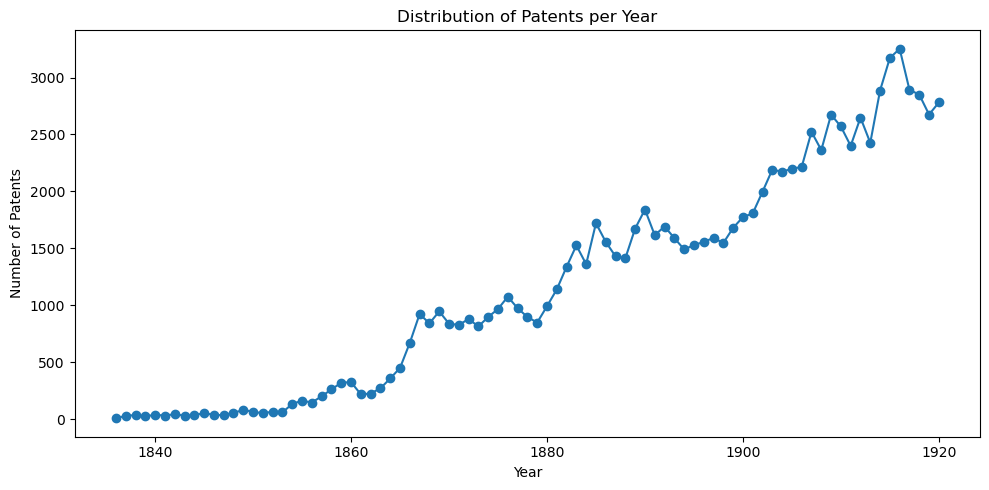

In [10]:
oldest_date = bert_analysis['date'].min()
newest_date = bert_analysis['date'].max()

print("Oldest date:", oldest_date)
print("Newest date:", newest_date)

bert_analysis['year'] = bert_analysis['date'].dt.year
yearly_counts = bert_analysis.groupby('year').size().reset_index(name='count')
yearly_counts = yearly_counts[yearly_counts["year"] <= 1920]

# Plot number of patents per year
plt.figure(figsize=(10, 5))
plt.plot(yearly_counts['year'], yearly_counts['count'], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Patents")
plt.title("Distribution of Patents per Year")
plt.tight_layout()
plt.show()

In [11]:
bert_time = bert_analysis.copy()
bert_time["date"] = pd.to_datetime(bert_time["date"])
bert_time = bert_time[bert_time["date"] < "1921-01-01"]

def plot_timeseries_sum(interest_df, bert_df, title, cat):
    """draws a interactive line chart of yearly percentage of patent, either by Cluster or SubCluster """

    word_col = "ClusterTopWords" if cat == "Cluster" else "SubClusterTopWords"

    bert = bert_df.copy()
    bert["date"] = pd.to_datetime(bert["date"])
    bert["year"] = bert["date"].dt.year

    interest = interest_df.copy()
    interest["date"] = pd.to_datetime(interest["date"])
    interest["year"] = interest["date"].dt.year

    # total patent counts per year
    total_per_year = (
        bert
        .groupby("year")
        .size()
        .rename("total_count")
        .reset_index()
    )

    # interest counts per (cat, year)
    interest_per_year = (
        interest
        .groupby([cat, "year"])
        .size()
        .rename("label_count")
        .reset_index()
    )

    # get percentage for each (cat, year)
    merged = (
        interest_per_year
        .merge(total_per_year, on="year", how="left")
    )
    merged["percentage"] = (merged["label_count"] / merged["total_count"]) * 100

    topwords = (
        interest[[cat, word_col]]
        .drop_duplicates(subset=cat)
    )
    merged = merged.merge(topwords, on=cat, how="left")

    if cat == "Cluster":
        fig = px.line(
            merged,
            x="year",
            y="percentage",
            color=cat,
            markers=True,
            hover_name=cat,
            hover_data={word_col: True, "percentage": True},
            color_discrete_map=COLOR_MAP
        )
    else:
        fig = px.line(
            merged,
            x="year",
            y="percentage",
            color=cat,
            markers=True,
            hover_name=cat,
            hover_data={word_col: True, "percentage": True}
        )

    fig.update_traces(mode="markers+lines")
    fig.update_layout(
        title=title,
        xaxis_title="Year",
        yaxis_title="Percentage of Patents",
        hovermode="closest",
        height=500
    )
    fig.show()


def plot_timeseries_report(df, title, cat, label, legend = "lower right"):
    """ draws a line chart of yearly percentage of patent, either by Cluster or SubCluster """
    
    word_col = "ClusterTopWords" if cat == "Cluster" else "SubClusterTopWords"

    df = df.copy()
    df["date"] = pd.to_datetime(df["date"])
    df["year"] = df["date"].dt.year

    # total patents per year
    total_per_year = (
        df
        .groupby("year")
        .size()
        .rename("total_count")
        .reset_index()
    )

    # count of patents in the specified cluster/subcluster per year
    df_label = df[df[cat] == label]
    label_per_year = (
        df_label
        .groupby("year")
        .size()
        .rename("label_count")
        .reset_index()
    )

    merged = total_per_year.merge(label_per_year, on="year", how="left").fillna(0)
    merged["label_count"] = merged["label_count"].astype(int)
    merged["percentage"] = (merged["label_count"] / merged["total_count"]) * 100

    topwords_row = df[[cat, word_col]].drop_duplicates(subset=cat)
    if label in topwords_row[cat].values:
        topwords = topwords_row[topwords_row[cat] == label][word_col].values[0]
    else:
        topwords = ""

    if cat == "Cluster":
        line_color = COLOR_MAP.get(int(label), "#888888")
    else:
        line_color = "#888888"  # random color for SubCluster

    plt.figure(figsize=(10, 6))
    plt.plot(
        merged["year"],
        merged["percentage"],
        marker="o",
        color=line_color,
        label=f"{label}: {topwords}"
    )
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Percentage of Patents (%)")
    plt.grid(True)
    plt.legend(title=f"{cat}", loc=legend, fontsize="medium", title_fontsize="medium")

    plt.tight_layout()
    plt.show()

### All 19 Clusters Analysis

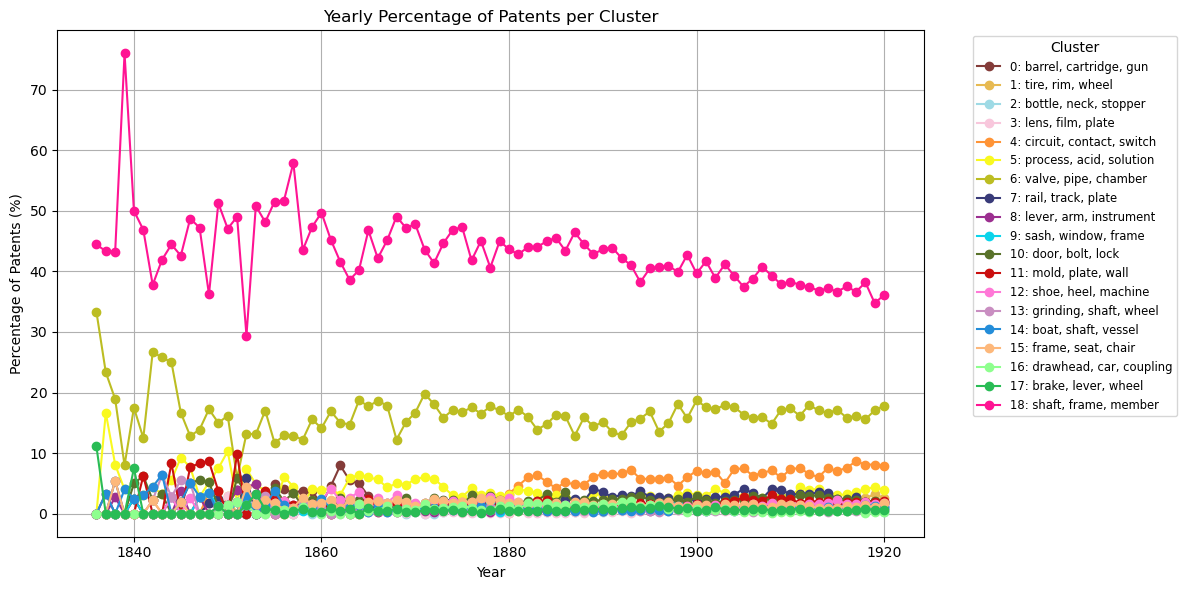

In [12]:
def plot_timeseries_sum_matplotlib(interest_df, bert_df, title, cat):
    """
    Draws a static Matplotlib line chart of yearly percentage of patents,
    either by Cluster or Sub-Cluster. The legend is placed outside the plot.
    Only the first three top-words per cluster are shown in the legend.

    Parameters:
    - interest_df: DataFrame filtered to the categories of interest (e.g., bert_df[bert_df["Cluster"] != -1])
    - bert_df: full DataFrame containing all patents
    - title: string, plot title
    - cat: either "Cluster" or "Sub-Cluster"
    """
    word_col = "ClusterTopWords" if cat == "Cluster" else "SubClusterTopWords"

    # 1) Prepare DataFrames: ensure datetime and extract year
    bert = bert_df.copy()
    bert["date"] = pd.to_datetime(bert["date"])
    bert["year"] = bert["date"].dt.year

    interest = interest_df.copy()
    interest["date"] = pd.to_datetime(interest["date"])
    interest["year"] = interest["date"].dt.year

    # 2) Compute total patents per year from full DataFrame
    total_per_year = (
        bert
        .groupby("year")
        .size()
        .rename("total_count")
        .reset_index()
    )

    # 3) Compute interest counts per (cat, year)
    interest_per_year = (
        interest
        .groupby([cat, "year"])
        .size()
        .rename("label_count")
        .reset_index()
    )

    # 4) Merge to get percentage per (cat, year)
    merged = interest_per_year.merge(total_per_year, on="year", how="left")
    merged["percentage"] = (merged["label_count"] / merged["total_count"]) * 100

    # 5) Bring in top-words for each category so we can label lines
    topwords = (
        interest[[cat, word_col]]
        .drop_duplicates(subset=cat)
        .set_index(cat)[word_col]
    )

    # Helper to extract first three words from a comma-separated string
    def first_three(words_str):
        if not isinstance(words_str, str) or not words_str.strip():
            return ""
        parts = [w.strip() for w in words_str.split(",")]
        return ", ".join(parts[:3])

    merged[word_col] = merged[cat].map(topwords)

    # 6) Pivot so rows = years, columns = category values, values = percentage
    pivot = merged.pivot(index="year", columns=cat, values="percentage").fillna(0)

    # 7) Plotting
    fig, ax = plt.subplots(figsize=(12, 6))

    # If plotting by Cluster, use COLOR_MAP; otherwise default cycle
    if cat == "Cluster":
        for cluster_id in sorted(pivot.columns):
            years = pivot.index
            percents = pivot[cluster_id].values
            full_topwords = topwords.get(cluster_id, "")
            top3 = first_three(full_topwords)
            label = f"{cluster_id}: {top3}"
            color = COLOR_MAP.get(cluster_id, "#888888")
            ax.plot(
                years,
                percents,
                marker="o",
                linestyle="-",
                color=color,
                label=label
            )
    else:
        # Sub-Cluster: use default color cycle, but still show only first 3 words
        for sc_id in sorted(pivot.columns):
            years = pivot.index
            percents = pivot[sc_id].values
            full_topwords = topwords.get(sc_id, "")
            top3 = first_three(full_topwords)
            label = f"{sc_id}: {top3}"
            ax.plot(
                years,
                percents,
                marker="o",
                linestyle="-",
                label=label
            )

    # 8) Labels and title
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Percentage of Patents (%)")
    ax.grid(True)

    # 9) Legend outside
    ax.legend(
        title=cat,
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        borderaxespad=0.5,
        fontsize="small",
        title_fontsize="medium"
    )

    plt.tight_layout()
    plt.show()
plot_timeseries_sum_matplotlib(bert_time[bert_time["Cluster"]!=-1], bert_time, "Yearly Percentage of Patents per Cluster", "Cluster")

In [13]:
plot_timeseries_sum(bert_time[bert_time["Cluster"]!=-1], bert_time, "Yearly Percentage of Patents per Cluster", "Cluster")

### Unclassified Cluster Sub-Cluster Analysis, Cluster = -1

In [14]:
unclass_sub = bert_time[
    (bert_time["Cluster"] == -1) & (bert_time["Sub-Cluster"] != -1) & (bert_time["Appartenance"] == 1)
]
plot_timeseries_sum(unclass_sub, bert_time, "Yearly Percentage of Patents per Sub-Cluster within -1", "Sub-Cluster")

#### Cigarettes / Tobacco, Cluster -1, Sub-Cluster 17/18

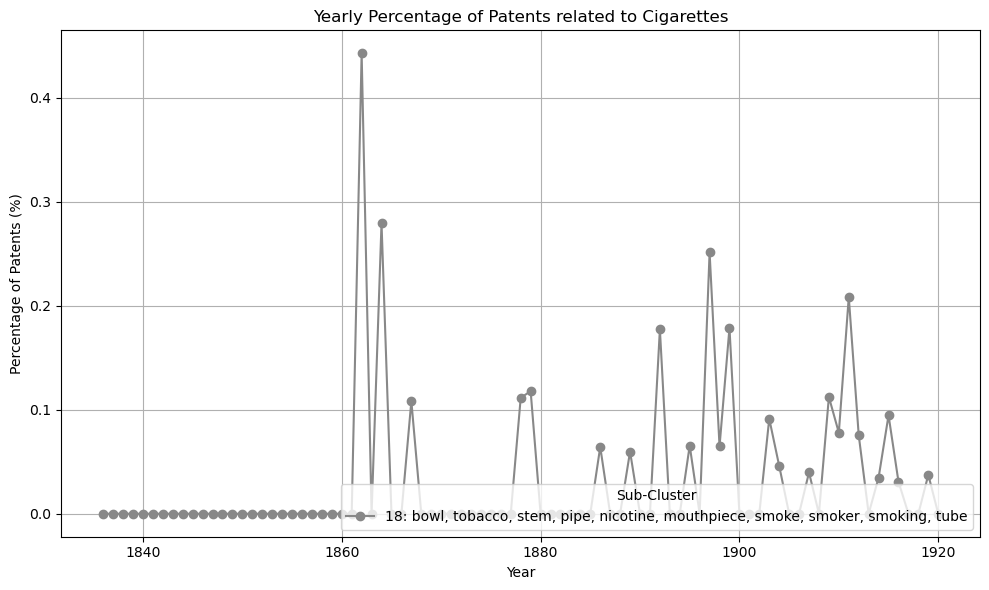

In [15]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to Cigarettes", "Sub-Cluster", 18)

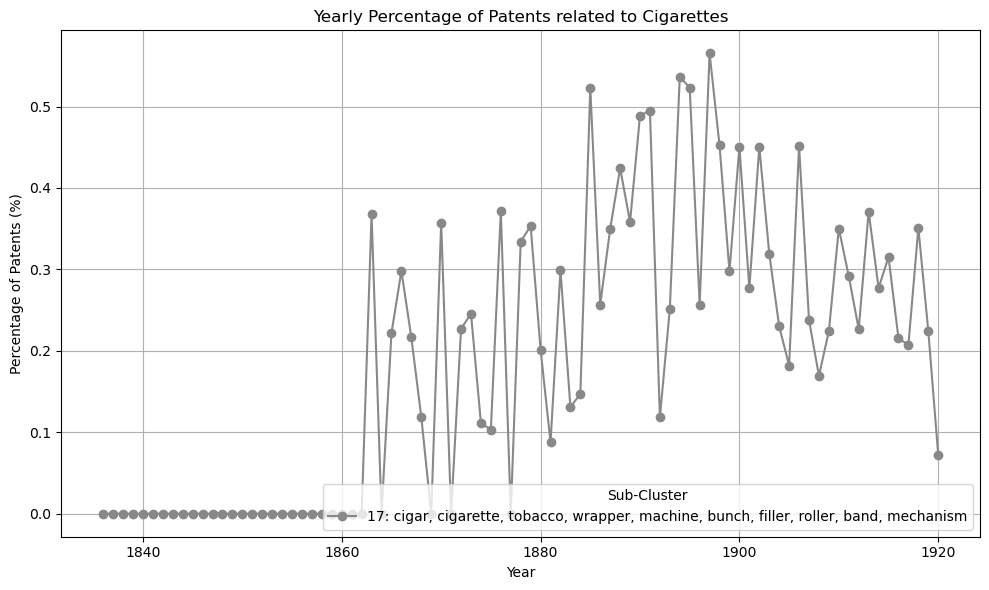

In [16]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to Cigarettes", "Sub-Cluster", 17)

### Guns, Cluster = 0

https://time.com/6207280/gun-industry-us-history/

The gun industry’s roots can be traced to the 19th-century era of European imperial expansion. “We were arming imperialism,” says Haag. “The four gun manufacturing titans in the 1800s—the Winchester Repeating Arms company, the Colt company, Remington, and Smith & Wesson—relied most heavily on international military contracts to survive.” Gunmakers were clustered in the Connecticut Valley—Colt, Winchester, Smith & Wesson (Springfield, Mass.)—due to a concentration of good power sources from water mills near the Connecticut River and skilled labor. Others, like Remington, originated not far away in Upstate New York for similar reasons.

Guns were marketed as necessary for self-defense out in the woods or on empty backroads. “Be prepared against country road hold-ups,” one early 20th-century Colt ad proclaimed. Ads promoted keeping a Colt pistol tucked between car seat cushions or in a lady’s muff or handbag. “There’s a lot of effort to create a sense of fear, to create a sense that guns were still needed even in a context where they might not have been really needed at all,” says Haag.

In the late 1910s, ads for Winchester maintained that “real boys” deserved to own a gun. One ad from the era suggested that buying a rifle for “the kid you’re so proud of” equated to other rites of passage in a young man’s life. A March 1921 sales publication for the manufacturer urged retailers to put guns in the hands of every 12-year-old. A boy should be taught to shoot a gun correctly because he’ll “get his hands on one sooner or later,” one ad intoned.

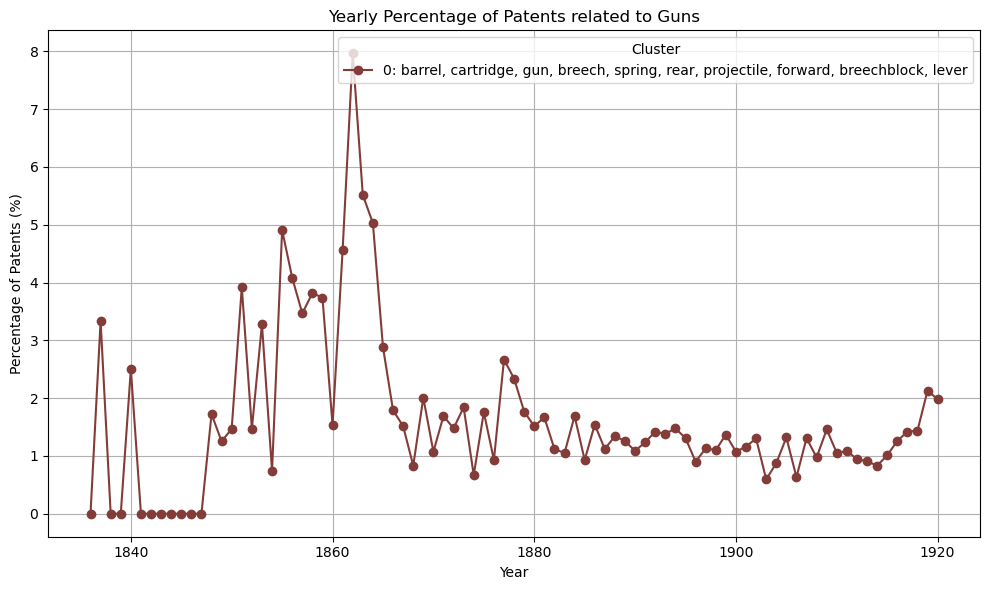

In [17]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to Guns", "Cluster", 0, "upper right")

### Music, Cluster 8

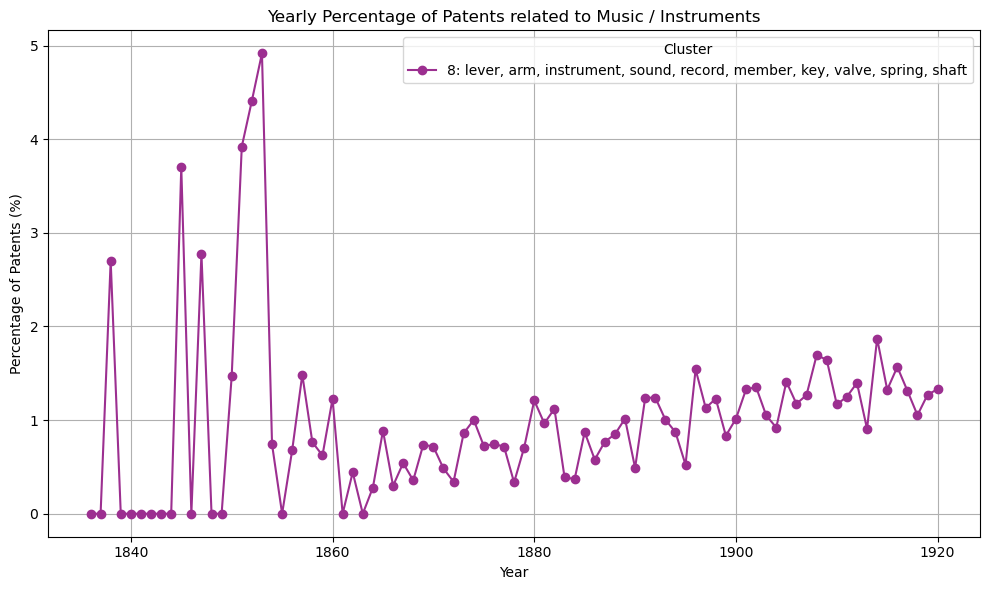

In [18]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to Music / Instruments", "Cluster", 8, legend="upper right")

### Machine Cluster (18) Sub-Cluster Analysis

In [19]:
machine_clu = bert_time[
    (bert_time["Cluster"] == 18) & (bert_time["Sub-Cluster"] != -1)
]
plot_timeseries_sum(machine_clu, bert_time, "Yearly Percentage of Patents related to Machines per Subcluster", "Sub-Cluster")

#### Washing Machines, Cluster 18, Sub-Cluster 291

Here's a more detailed timeline of key developments:
Early 1800s: Various early machines were patented, including devices with rotating cages and hand-cranked washing machines. 
1851: James King patented a drum-based machine that used water pressure to agitate clothes. 
1858: Hamilton Smith patented a rotary washing machine. 
1868: Thomas Bradford created a commercially successful washing machine resembling modern ones. 
Early 1900s: Alva J. Fisher invented the first electric washing machine. 
1937: Bendix Home Appliances introduced the first automatic domestic washing machine. 

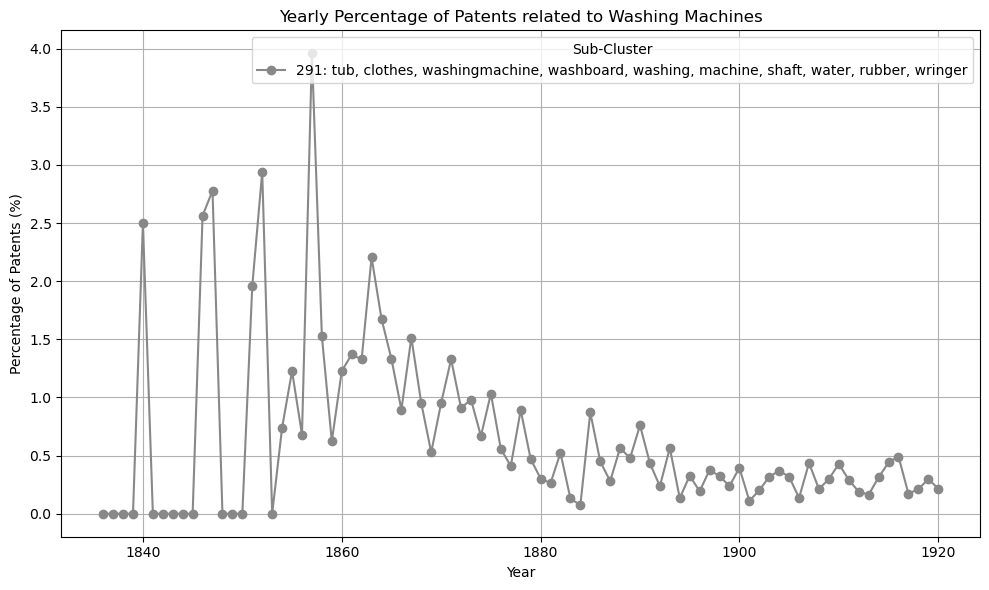

In [20]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to Washing Machines", "Sub-Cluster", 291, legend = "upper right")

#### Type Writer, Cluster 18, Sub-Cluster 395

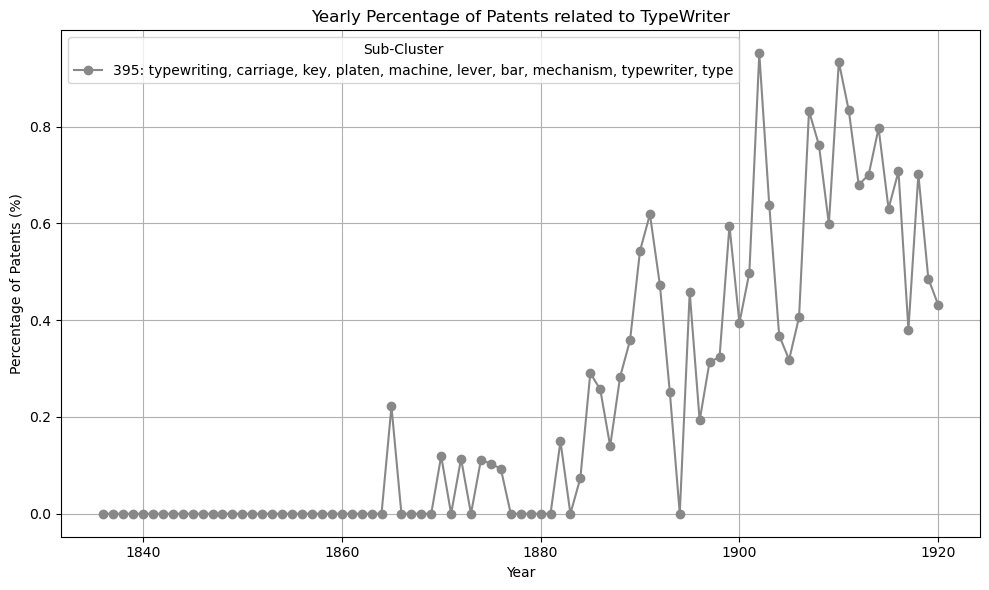

In [21]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to TypeWriter", "Sub-Cluster", 395, legend = "upper left")

### Camera, Cluster 3

A number of manufacturers started to use 35 mm film for still photography between 1905 and 1913. The first 35 mm cameras available to the public, and reaching significant numbers in sales were the Tourist Multiple, in 1913, and the Simplex, in 1914. [citation needed]

Oskar Barnack, who was in charge of research and development at Leitz, decided to investigate using 35 mm cine film for still cameras while attempting to build a compact camera capable of making high-quality enlargements. He built his prototype 35 mm camera (Ur-Leica) around 1913, though further development was delayed for several years by World War I. It wasn't until after World War I that Leica commercialized their first 35 mm cameras. Leitz test-marketed the design between 1923 and 1924, receiving enough positive feedback that the camera was put into production as the Leica I (for Leitz camera) in 1925. The Leica's immediate popularity spawned several of competitors, most notably the Contax (introduced in 1932), and cemented the position of 35 mm as the format of choice for high-end compact cameras.

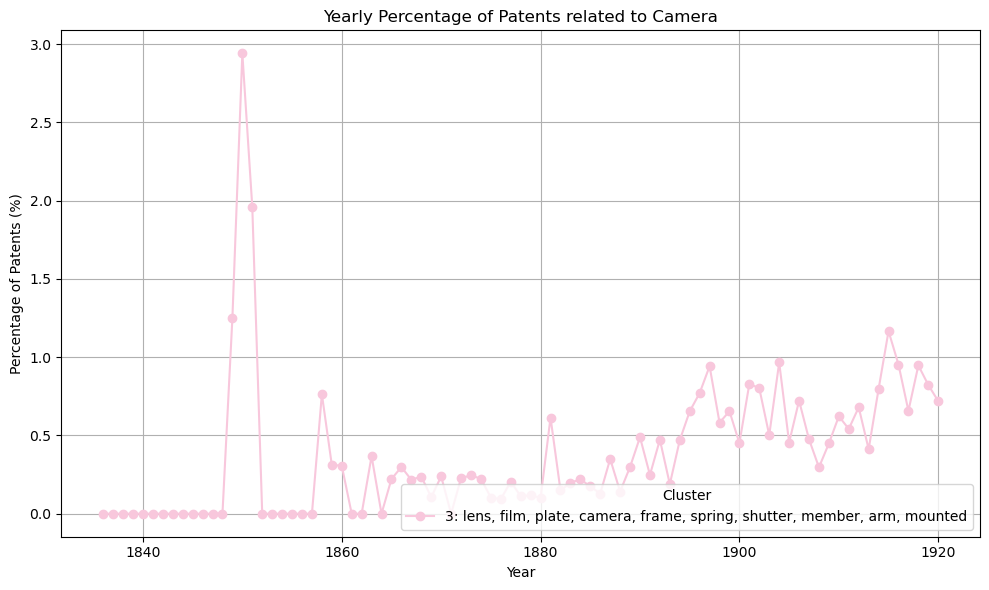

In [22]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to Camera", "Cluster", 3)

### Electronics Cluster (4) Sub-Cluster Analysis

In [23]:
electro_clu = bert_time[
    (bert_time["Cluster"] == 4) & (bert_time["Sub-Cluster"] != -1)
]
plot_timeseries_sum(electro_clu, bert_time, "Yearly Percentage of Patents related to Electromagnetic", "Sub-Cluster")

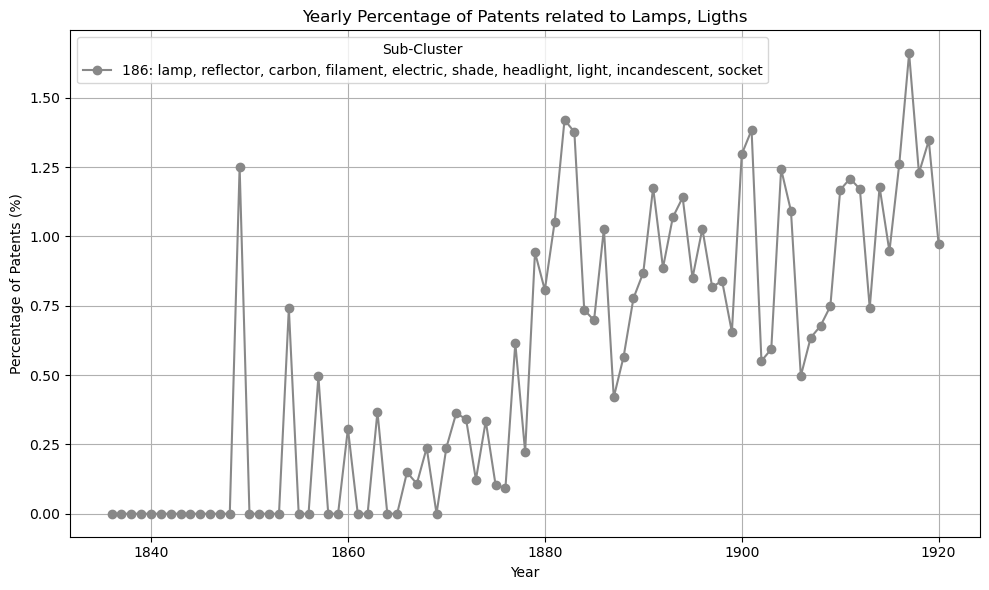

In [25]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to Lamps, Ligths", "Sub-Cluster", 186, legend="upper left")

#### Telephones, Cluster 4, Sub-Cluster 165

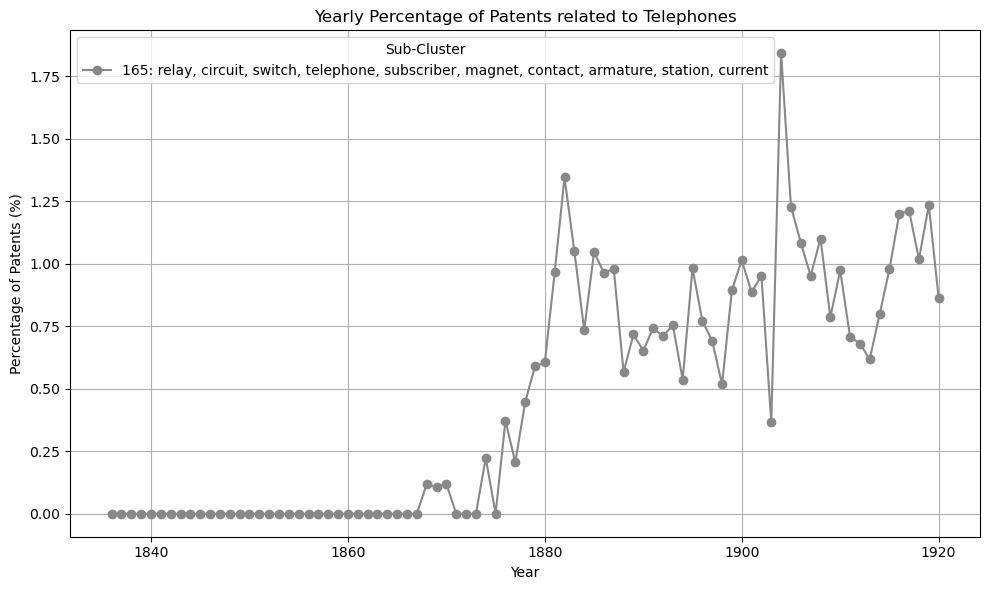

In [26]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to Telephones", "Sub-Cluster", 165, legend="upper left")

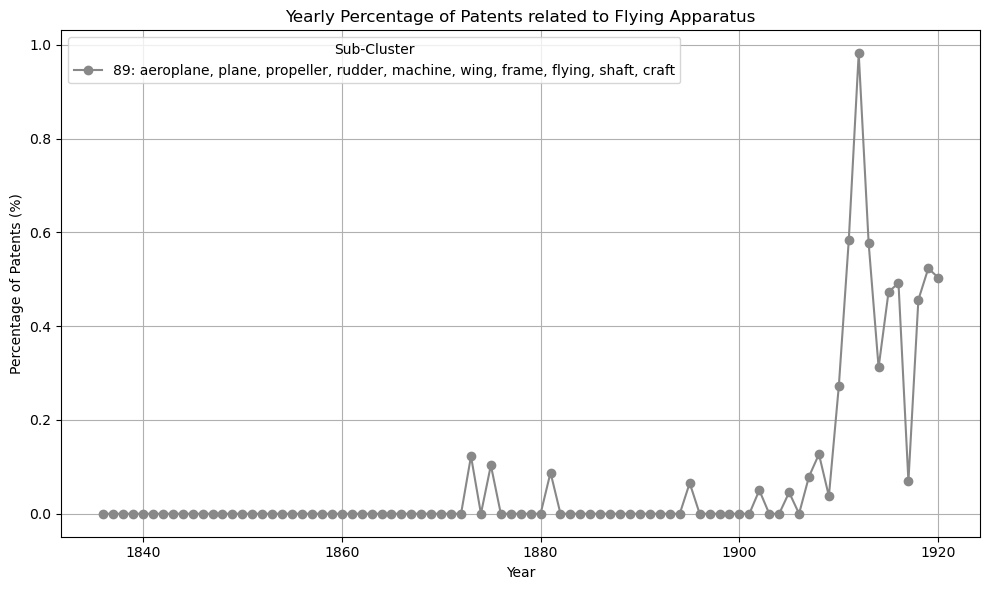

In [27]:
plot_timeseries_report(bert_time, "Yearly Percentage of Patents related to Flying Apparatus", "Sub-Cluster", 89, legend="upper left")

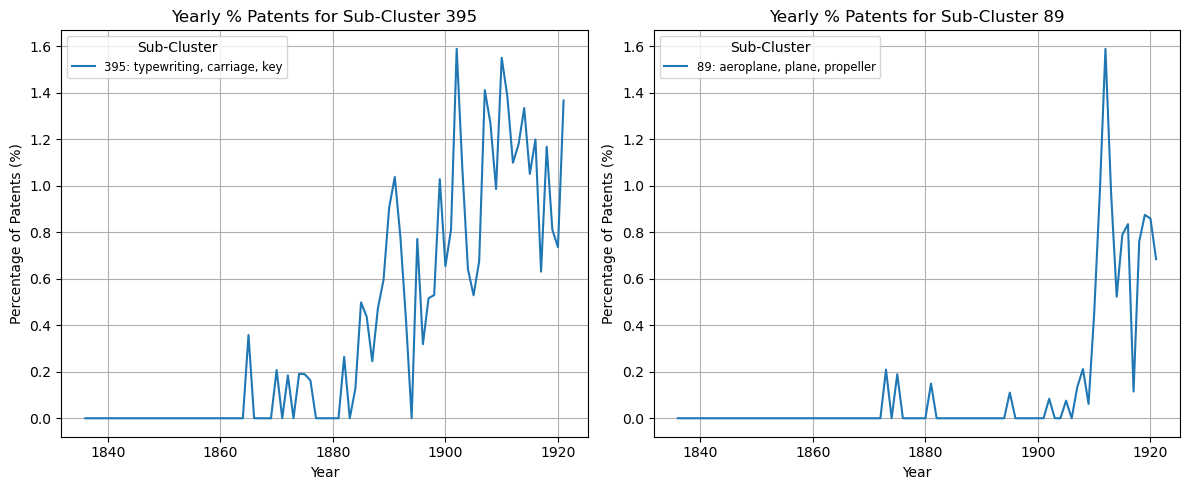

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Call it for Sub-Cluster 291 on the left
plot_timeseries_double(
    bert_analysis, 
    title="Yearly % Patents for Sub-Cluster 395", 
    cat="Sub-Cluster", 
    label=395, 
    ax=ax1, 
    legend_loc="upper left"
)

# Call it for Sub-Cluster 305 on the right
plot_timeseries_double(
    bert_analysis, 
    title="Yearly % Patents for Sub-Cluster 89", 
    cat="Sub-Cluster", 
    label=89, 
    ax=ax2, 
    legend_loc="upper left"
)

plt.tight_layout()
plt.show()

In [29]:
display(bert_time[bert_time["Sub-Cluster"] == 89].sort_values(by="date"))

patent_id  Cluster  Sub-Cluster  MembershipStrength   
10593    141785       -1           89            0.000000  \
10642    161771       -1           89            0.000000   
56085    240475       14           89            0.825766   
10671    547553       -1           89            0.000000   
10720    693297       -1           89            0.000000   
...         ...      ...          ...                 ...   
10575   1355256       -1           89            0.000000   
10717   1355315       -1           89            0.000000   
10571   1359078       -1           89            0.000000   
10691   1358915       -1           89            0.000000   
10600   1362070       -1           89            0.000000   

                                                TopWords   
10593  float, apparatus, propeller, rearward, main, f...  \
10642  propeller, balloon, toy, aerial, peter, car, m...   
56085  propellershaft, crank, bevelgears, boat, butto...   
10671  cord, winged, flight, wing, pulley, bird, kell...   
10720  toy, flying, propeller, bird, bos, mechanism, ...   
...                                                  ...   
10575  plane, inter, aeroplane, lifting, incidence, r...   
10717  bicycle, aeroplane, propeller, aviator, pedal,...   
10571  pulley, propeller, aeroplane, ground, toy, rot...   
10691  fuselage, wing, disk, aeroplane, unfolded, rac...   
10600  plane, balancing, sustaining, aeroplane, sleev...   

                                         ClusterTopWords   
10593                                                NaN  \
10642                                                NaN   
56085  boat, shaft, vessel, water, propeller, blade, ...   
10671                                                NaN   
10720                                                NaN   
...                                                  ...   
10575                                                NaN   
10717                                                NaN   
10571                                                NaN   
10691                                                NaN   
10600                                                NaN   

                                      SubClusterTopWords    umap_x    umap_y   
10593  aeroplane, plane, propeller, rudder, machine, ...  6.860395  7.214422  \
10642  aeroplane, plane, propeller, rudder, machine, ...  6.873301  7.238188   
56085  aeroplane, plane, propeller, rudder, machine, ...  6.874489  7.191834   
10671  aeroplane, plane, propeller, rudder, machine, ...  6.898223  7.267861   
10720  aeroplane, plane, propeller, rudder, machine, ...  6.890276  7.291047   
...                                                  ...       ...       ...   
10575  aeroplane, plane, propeller, rudder, machine, ...  6.866585  7.269878   
10717  aeroplane, plane, propeller, rudder, machine, ...  6.876725  7.270149   
10571  aeroplane, plane, propeller, rudder, machine, ...  6.912340  7.236932   
10691  aeroplane, plane, propeller, rudder, machine, ...  6.858365  7.253191   
10600  aeroplane, plane, propeller, rudder, machine, ...  6.859535  7.273888   

       closest_cluster  Appartenance   patent       date    month    year  
10593              6.0           2.0   141785 1873-08-12  1873-08  1873.0  
10642              6.0           2.0   161771 1875-04-06  1875-04  1875.0  
56085              6.0           2.0   240475 1881-04-19  1881-04  1881.0  
10671              6.0           2.0   547553 1895-10-08  1895-10  1895.0  
10720              6.0           2.0   693297 1902-02-11  1902-02  1902.0  
...                ...           ...      ...        ...      ...     ...  
10575              6.0           2.0  1355256 1920-10-12  1920-10  1920.0  
10717              6.0           2.0  1355315 1920-10-12  1920-10  1920.0  
10571              6.0           2.0  1359078 1920-11-16  1920-11  1920.0  
10691              6.0           2.0  1358915 1920-11-16  1920-11  1920.0  
10600              6.0           2

## NBER Classification Comparison

In [30]:
def plot_comparison(df, category_name, title):
    """function that plots the distribution of clusters within the NBER categories/subcategories"""
    bert_data = (
        df[df["Cluster"] != -1]
        .merge(
            df_cat,
            left_on="patent_id",
            right_on="patent",
            how="left"
        )
    )

    # create a top-words mapping
    cluster_words = (
        df[["Cluster", "ClusterTopWords"]]
        .drop_duplicates("Cluster")
    )

    # count patents per (cluster, subcategory)
    distribution_counts = (
        bert_data
        .groupby(["Cluster", category_name])
        .size()
        .reset_index(name="count")
        .merge(cluster_words, on="Cluster", how="left")
    )

    def first_three(words_str):
        """helper to get the first three top words"""
        parts = [w.strip() for w in words_str.split(",")]
        return ", ".join(parts[:3])

    distribution_counts["ClusterLabel"] = distribution_counts.apply(
        lambda row: f"{row['Cluster']}: {first_three(row['ClusterTopWords'])}",
        axis=1
    )

    pivot_df = distribution_counts.pivot(
        index=category_name,
        columns="ClusterLabel",
        values="count"
    ).fillna(0)

    cluster_labels = sorted(
        list(pivot_df.columns),
        key=lambda lab: int(lab.split(":")[0])
    )

    colors = [
        COLOR_MAP[int(cl.split(":")[0])]
        for cl in cluster_labels
    ]

    fig, ax = plt.subplots(figsize=(12, 8))
    bottom = pd.Series([0] * len(pivot_df), index=pivot_df.index)

    for i, cl in enumerate(cluster_labels):
        ax.bar(
            pivot_df.index,
            pivot_df[cl],
            bottom=bottom,
            color=colors[i],
            label=cl
        )
        bottom += pivot_df[cl]

    ax.set_xlabel(f"NBER {title}")
    ax.set_ylabel("Number of Patents")
    ax.set_title(f"Patent Counts by NBER {title} (stacked by Cluster)")
    plt.xticks(rotation=45, ha="right")

    # place legend outside the plot
    ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.tight_layout()
    plt.show()

### NBER Category Comparison

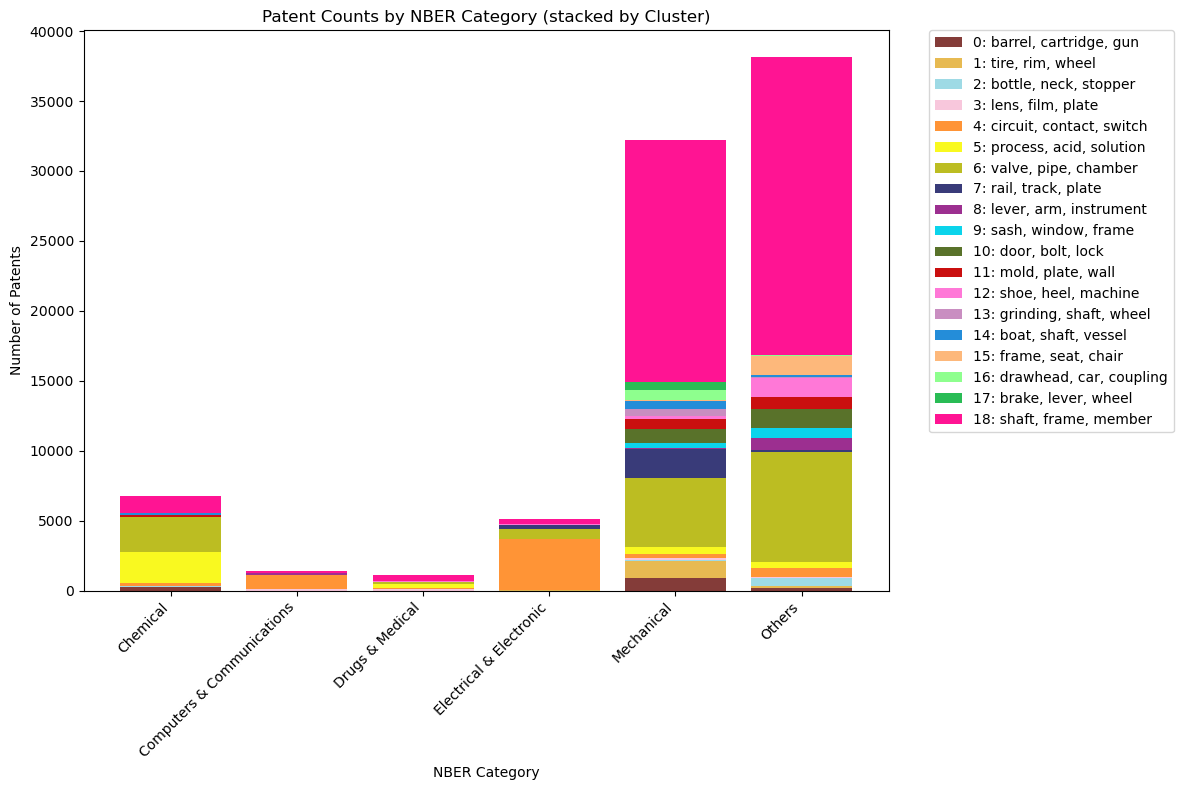

In [31]:
plot_comparison(bert_analysis, "nber_cat_name", "Category")

### NBER Sub-Category Comparison

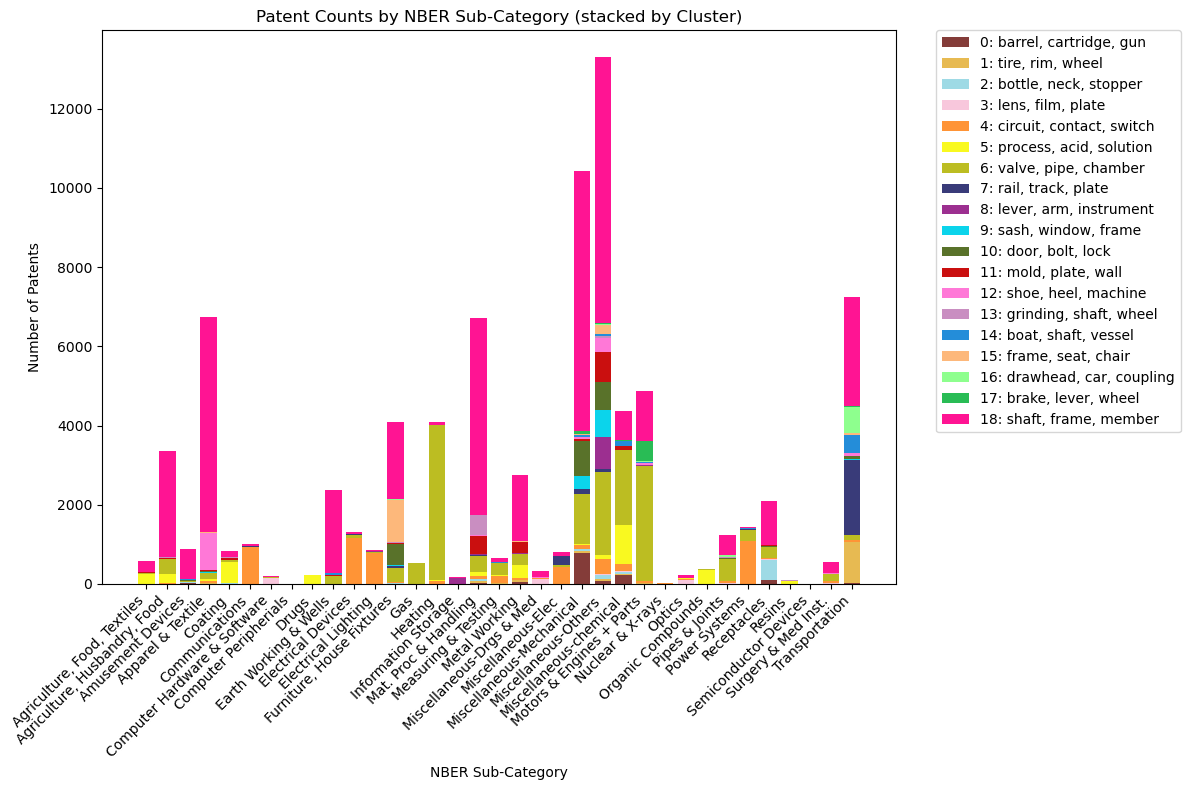

In [32]:
plot_comparison(bert_analysis, "nber_subcat_name", "Sub-Category")

## Fine-Grained Clustering Analysis

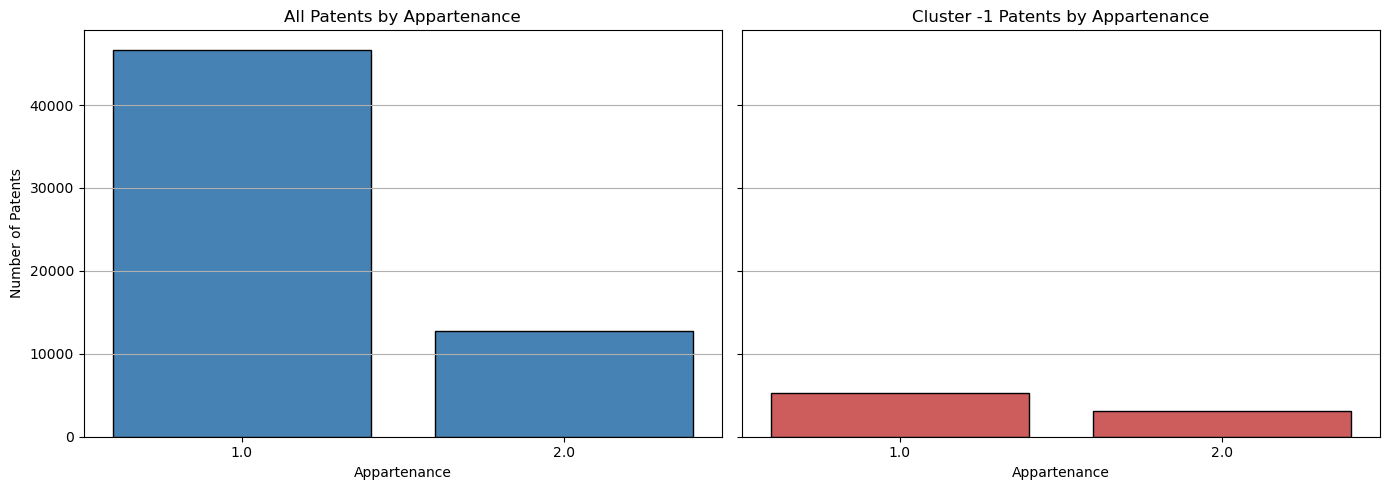

In [33]:
full_counts = bert_analysis[bert_analysis["Sub-Cluster"] != -1]["Appartenance"].value_counts().sort_index()
cluster_minus1_counts = bert_analysis[
    (bert_analysis["Cluster"] == -1) & 
    (bert_analysis["Sub-Cluster"] != -1)
]["Appartenance"].value_counts().sort_index()

all_indices = sorted(set(full_counts.index).union(set(cluster_minus1_counts.index)))
full_counts = full_counts.reindex(all_indices, fill_value=0)
cluster_minus1_counts = cluster_minus1_counts.reindex(all_indices, fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# full dataset
axes[0].bar(full_counts.index.astype(str), full_counts.values, color='steelblue', edgecolor='black')
axes[0].set_title("All Patents by Appartenance")
axes[0].set_xlabel("Appartenance")
axes[0].set_ylabel("Number of Patents")
axes[0].grid(axis='y')

# cluster -1
axes[1].bar(cluster_minus1_counts.index.astype(str), cluster_minus1_counts.values, color='indianred', edgecolor='black')
axes[1].set_title("Cluster -1 Patents by Appartenance")
axes[1].set_xlabel("Appartenance")
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [34]:
total = len(bert_analysis)

results = {
    "Unclassified by Cluster": (bert_analysis["Cluster"] == -1).sum(),
    "Unclassified by Sub-Cluster": (bert_analysis["Sub-Cluster"] == -1).sum(),
    "Both Cluster and Sub-Cluster == -1": ((bert_analysis["Cluster"] == -1) & (bert_analysis["Sub-Cluster"] == -1)).sum(),
    "Cluster == -1 and Sub-Cluster != -1": ((bert_analysis["Cluster"] == -1) & (bert_analysis["Sub-Cluster"] != -1)).sum(),
    "Cluster != -1 and Sub-Cluster == -1": ((bert_analysis["Cluster"] != -1) & (bert_analysis["Sub-Cluster"] == -1)).sum(),
    "Sub-Clusters (Cluster == -1 & Sub-Cluster != -1 & Appartenance == 1)" : bert_analysis[
        (bert_analysis["Cluster"] == -1) & (bert_analysis["Sub-Cluster"] != -1) & (bert_analysis["Appartenance"] == 1)
            ]["Sub-Cluster"].nunique()
}

print("Patent Classification Summary")
for k, v in results.items():
    if isinstance(v, tuple) or isinstance(v, list):
        count = v[0]
    else:
        count = v
    if "Sub-Clusters" not in k:
        percent = 100 * count / total
        print(f"{k}: {count} patents ({percent:.1f}%)")
    else:
        print(f"{k}: {count} unique sub-clusters")

Patent Classification Summary
Unclassified by Cluster: 15269 patents (15.3%)
Unclassified by Sub-Cluster: 40572 patents (40.6%)
Both Cluster and Sub-Cluster == -1: 6945 patents (6.9%)
Cluster == -1 and Sub-Cluster != -1: 8324 patents (8.3%)
Cluster != -1 and Sub-Cluster == -1: 33627 patents (33.6%)
Sub-Clusters (Cluster == -1 & Sub-Cluster != -1 & Appartenance == 1): 86 unique sub-clusters


In [35]:
multi_app = 100*len(bert_analysis[bert_analysis["Appartenance"] == 2])/len(bert_analysis)
print(f"{multi_app:.2f}% of sub-clusters belong to two different clusters.")

12.76% of sub-clusters belong to two different clusters.


In [36]:
# number of "new" categories
new_cat_count = bert_analysis[
        (bert_analysis["Cluster"] == -1) & (bert_analysis["Sub-Cluster"] != -1) & (bert_analysis["Appartenance"] == 1)
            ]["Sub-Cluster"].nunique()
unclass_sub = bert_analysis[
        (bert_analysis["Cluster"] == -1) & (bert_analysis["Sub-Cluster"] != -1) & (bert_analysis["Appartenance"] == 2)
            ]["Sub-Cluster"].nunique()
un_unclass_sub = bert_analysis[
        (bert_analysis["Cluster"] == -1) & (bert_analysis["Sub-Cluster"] == -1)
            ]["Sub-Cluster"].nunique()

total_sub_unclass = bert_analysis[(bert_analysis["Cluster"] == -1)]["Sub-Cluster"].nunique()

print(f"{100*new_cat_count/total_sub_unclass:.2f} of the sub-clusters previously unclassified are new categories.")
print(f"{100*unclass_sub/total_sub_unclass:.2f} of the sub-clusters previously unclassified are split between 2 clusters.")
print(f"{100*un_unclass_sub/total_sub_unclass:.2f} of the sub-clusters previously unclassified are still unclassified.")

print(f"There are {total_sub_unclass} subclusters previously unclassified.")


56.21 of the sub-clusters previously unclassified are new categories.
43.14 of the sub-clusters previously unclassified are split between 2 clusters.
0.65 of the sub-clusters previously unclassified are still unclassified.
There are 153 subclusters previously unclassified.


In [37]:
def plot_sub(df, mask, title): 
    """function to plot the distribution of sub-clusters within the df"""
    df_sc = df[mask]

    count_df = (
        df_sc
        .groupby("Sub-Cluster")
        .size()
        .reset_index(name="count")
    )

    subcluster_words = (
        df[["Sub-Cluster", "SubClusterTopWords"]]
        .drop_duplicates("Sub-Cluster")
    )

    count_df = count_df.merge(subcluster_words, on="Sub-Cluster", how="left")

    def first_three(words_str):
        parts = [w.strip() for w in words_str.split(",")]
        return ", ".join(parts[:3])

    count_df["Top3"] = count_df["SubClusterTopWords"].apply(first_three)

    x_positions = list(range(len(count_df)))
    counts = count_df["count"]
    xtick_labels = [
        f"{int(row['Sub-Cluster'])}: {row['Top3']}"
        for _, row in count_df.iterrows()
    ]

    fig, ax = plt.subplots(figsize=(19, 8))
    ax.bar(x_positions, counts, color="#6baed6")

    ax.set_xlabel("Sub-Cluster")
    ax.set_ylabel("Number of Patents")
    ax.set_title(title)

    ax.set_xticks(x_positions)
    ax.set_xticklabels(xtick_labels, rotation=45, ha="right", fontsize=10)

    plt.tight_layout()
    plt.show()

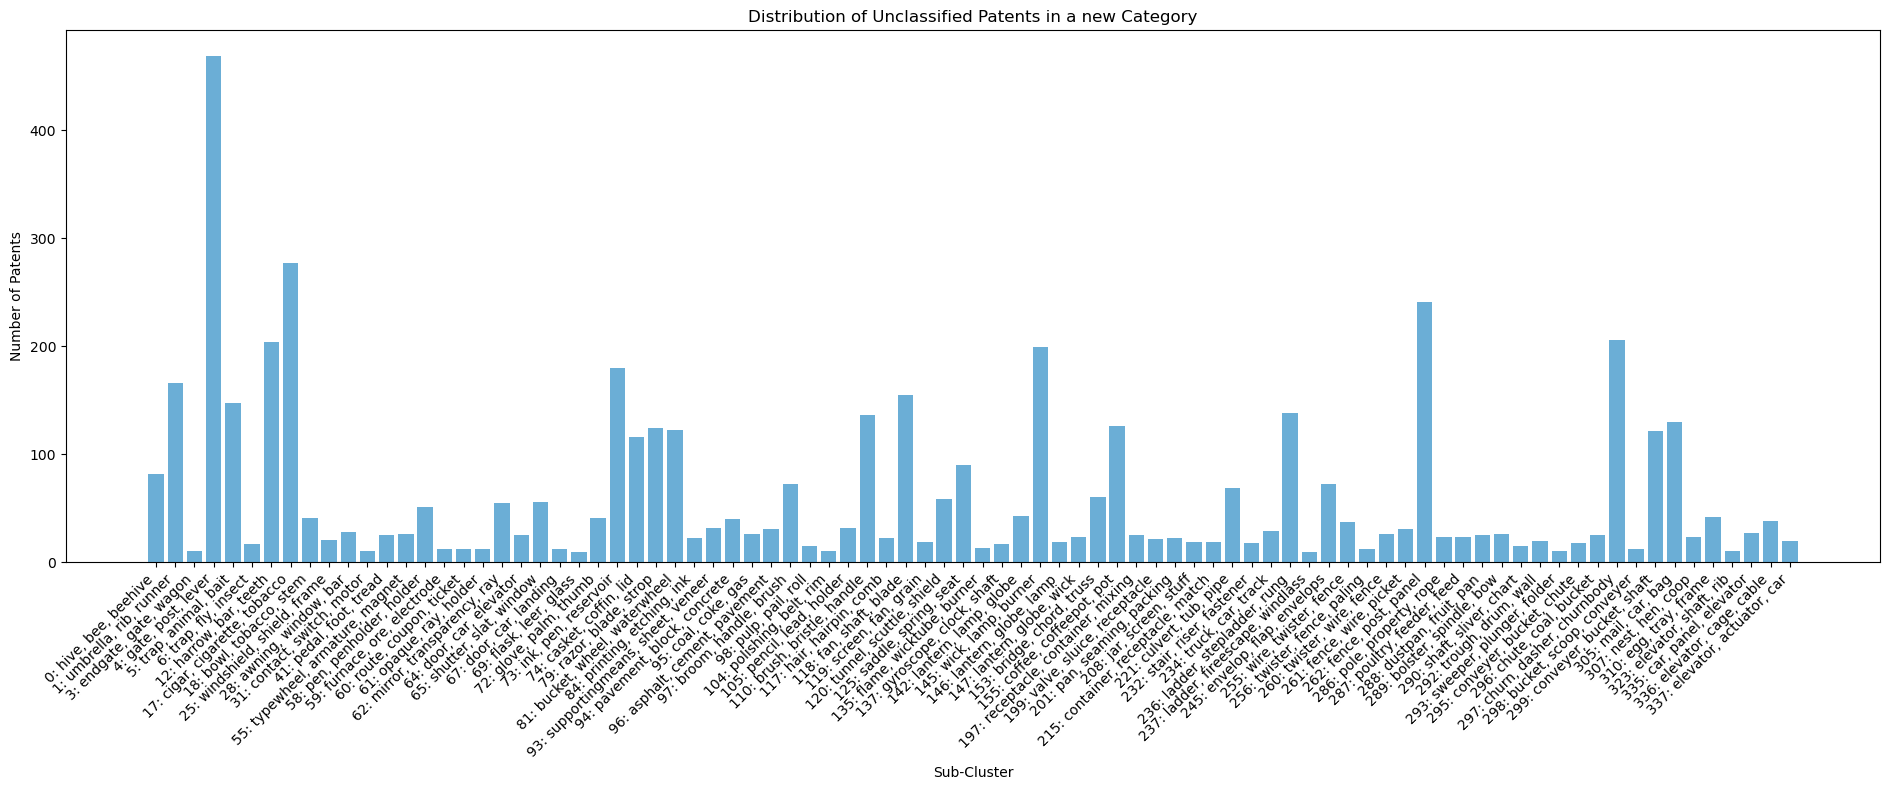

In [38]:
mask = (
    (bert_analysis["Cluster"] == -1) &
    (bert_analysis["Sub-Cluster"] != -1) &
    (bert_analysis["Appartenance"] == 1)
)
plot_sub(bert_analysis, mask, "Distribution of Unclassified Patents in a new Category")

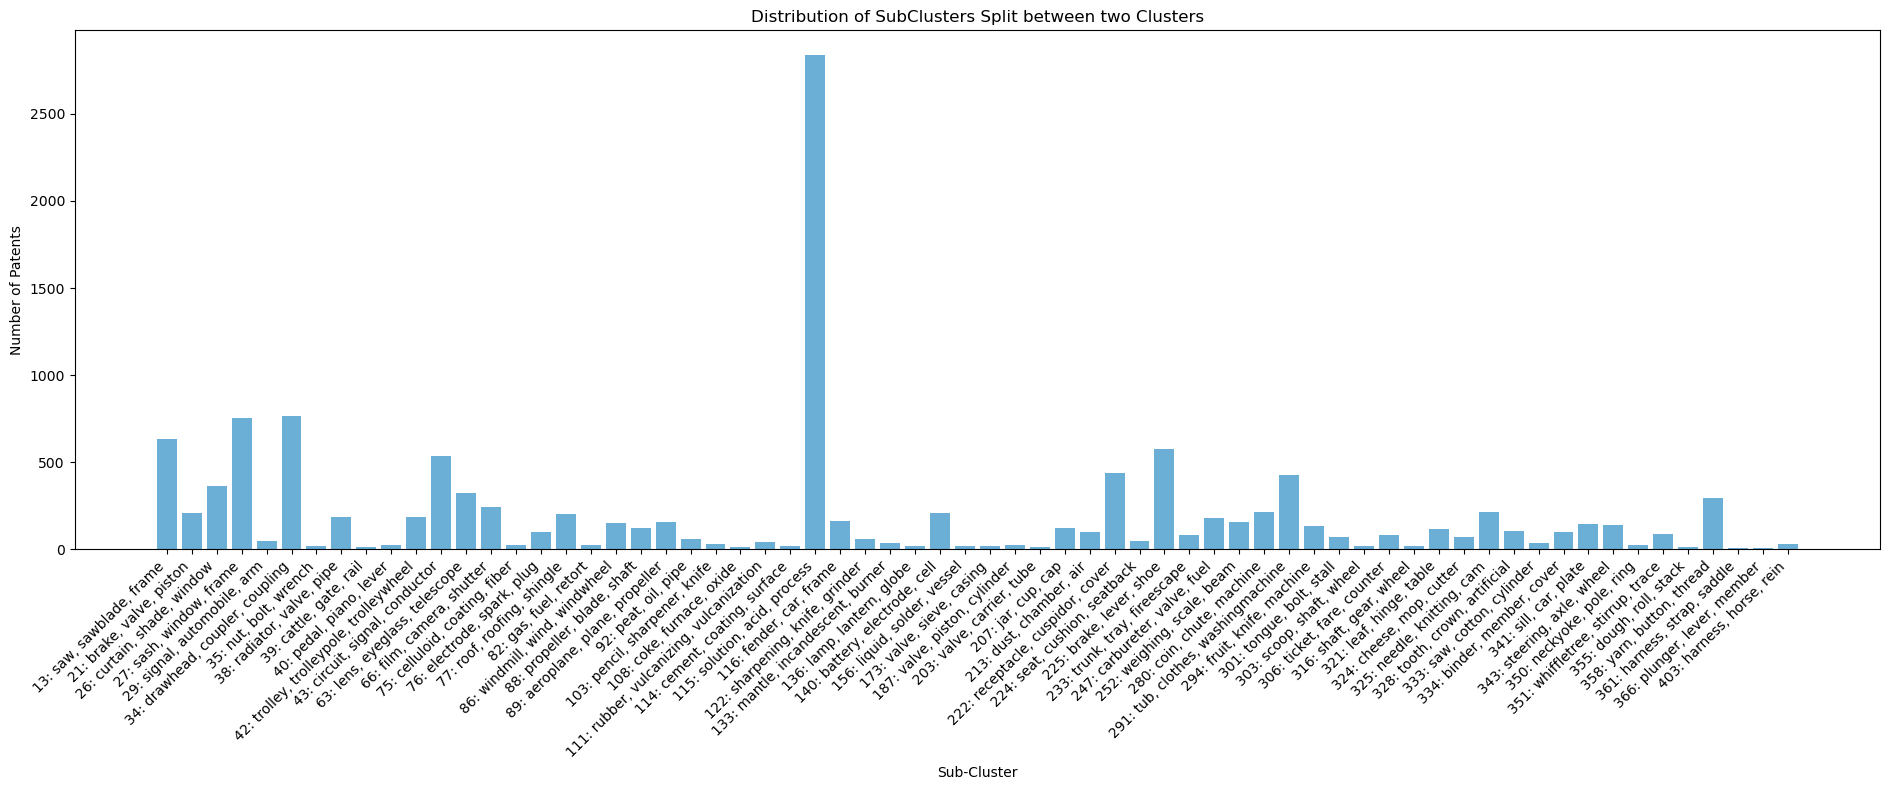

In [39]:
split_mask = (
    (bert_analysis["Appartenance"] == 2)
)
plot_sub(bert_analysis, split_mask, "Distribution of SubClusters Split between two Clusters")

In [40]:
subclusters_in_18 = bert_analysis.loc[
    (bert_analysis["Cluster"] == 18) & (bert_analysis["Sub-Cluster"] != -1),
    "Sub-Cluster"
].nunique()

print(f"Number of sub-clusters in Cluster 18: {subclusters_in_18}")

Number of sub-clusters in Cluster 18: 349


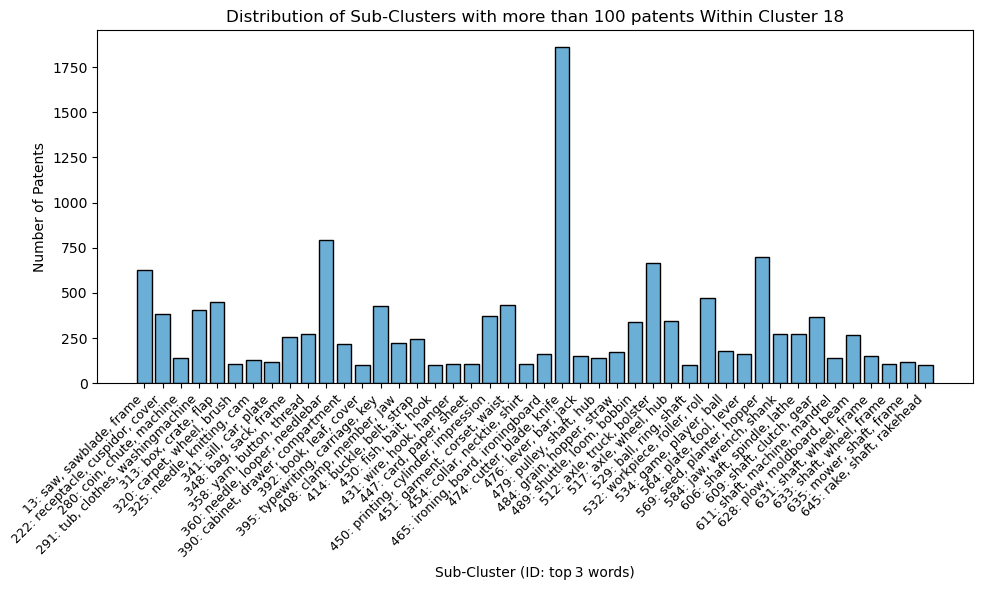

In [41]:
machine_mask = bert_analysis[
    (bert_analysis["Cluster"] == 18) & 
    (bert_analysis["Sub-Cluster"] != -1)
]

count_df = (
    machine_mask
    .groupby("Sub-Cluster")
    .size()
    .reset_index(name="count")
    .sort_values("Sub-Cluster")
)

count_df = count_df[count_df["count"]>= 100]

total_18 = count_df["count"].sum()
count_df["percentage"] = 100 * count_df["count"] / total_18

subcluster_words = (
    bert_analysis[["Sub-Cluster", "SubClusterTopWords"]]
    .drop_duplicates(subset="Sub-Cluster")
    .set_index("Sub-Cluster")["SubClusterTopWords"]
)

def first_three(words_str):
    if not isinstance(words_str, str) or words_str.strip() == "":
        return ""
    parts = [w.strip() for w in words_str.split(",")]
    return ", ".join(parts[:3])

count_df["top3"] = count_df["Sub-Cluster"].apply(
    lambda sc: first_three(subcluster_words.get(sc, ""))
)

x_positions = list(range(len(count_df)))
x_labels = [f"{int(row['Sub-Cluster'])}: {row['top3']}" for _, row in count_df.iterrows()]
values = count_df["count"].tolist()

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x_positions, values, color="#6baed6", edgecolor="black")

ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=9)
ax.set_xlabel("Sub-Cluster (ID: top 3 words)")
ax.set_ylabel("Number of Patents")
ax.set_title("Distribution of Sub-Clusters with more than 100 patents Within Cluster 18", fontsize=12)

plt.tight_layout()
plt.show()

In [42]:
all_subclusters = bert_analysis[bert_analysis["Sub-Cluster"] != -1]["Sub-Cluster"].unique()

sub_with_app2 = bert_analysis[bert_analysis["Sub-Cluster"] != -1].loc[
    bert_analysis["Appartenance"] == 2, 
    "Sub-Cluster"
].unique()

sub_unclass_1 = bert_analysis[(bert_analysis["Sub-Cluster"] != -1) & (bert_analysis["Cluster"] == -1)].loc[
    bert_analysis["Appartenance"] == 1,
    "Sub-Cluster"
].unique()

sub_unclass_2 = bert_analysis[(bert_analysis["Sub-Cluster"] != -1) & (bert_analysis["Cluster"] == -1)].loc[
    bert_analysis["Appartenance"] == 2, 
    "Sub-Cluster"
].unique()

percent_app2 = 100 * len(sub_with_app2) / len(all_subclusters)

print(f"Unclassified Sub-Clusters with Appartenance == 1: {len(sub_unclass_1)}")
print(f"Unclassified Sub-Clusters with Appartenance == 2: {len(sub_unclass_2)}")

print(f"Sub-Clusters with Appartenance == 2: {len(sub_with_app2)}")
print(f"→ {percent_app2:.1f}% of all Sub-Clusters have Appartenance == 2")

Unclassified Sub-Clusters with Appartenance == 1: 86
Unclassified Sub-Clusters with Appartenance == 2: 66
Sub-Clusters with Appartenance == 2: 66
→ 10.2% of all Sub-Clusters have Appartenance == 2


In [43]:
sub_to_clusters = bert_analysis[bert_analysis["Appartenance"] == 2].groupby("Sub-Cluster")["Cluster"].unique()

not_split_with_minus1 = []
for subclu, parent_arr in sub_to_clusters.items():
    if -1 not in parent_arr:
        not_split_with_minus1.append((subclu, parent_arr.tolist()))

if not not_split_with_minus1:
    print("✅ Every Sub-Cluster that spans multiple Clusters has −1 as one of its parent clusters.")
else:
    print("⚠️ Some Sub-Clusters span multiple Clusters without involving −1:")
    for subclu, parents in not_split_with_minus1:
        print(f"   • Sub-Cluster {subclu} → parent Clusters = {parents}")

✅ Every Sub-Cluster that spans multiple Clusters has −1 as one of its parent clusters.
